In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load data
customer_data = pd.read_csv('../Mall_Customers.csv')

In [4]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# create feature matrix (X)
X = customer_data.iloc[:, 3:].values

In [15]:
# split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

In [16]:
X_train

array([[ 73,   5],
       [ 48,  50],
       [ 28,  32],
       [ 64,  46],
       [ 87,  27],
       [ 47,  59],
       [ 19,   3],
       [ 54,  54],
       [ 67,  43],
       [ 76,  87],
       [ 49,  42],
       [ 70,  29],
       [ 99,  39],
       [ 60,  50],
       [ 78,  90],
       [ 28,  14],
       [ 30,   4],
       [ 79,  35],
       [ 38,  35],
       [ 44,  50],
       [ 71,  75],
       [ 60,  47],
       [ 97,  86],
       [ 23,  98],
       [ 78,  76],
       [ 60,  49],
       [ 43,  45],
       [ 81,  93],
       [ 42,  60],
       [ 57,  58],
       [ 74,  72],
       [ 59,  55],
       [ 73,  73],
       [ 62,  48],
       [ 77,  12],
       [ 58,  46],
       [ 63,  48],
       [ 20,  13],
       [ 28,  61],
       [ 75,  93],
       [101,  68],
       [ 40,  55],
       [ 74,  10],
       [120,  79],
       [ 63,  43],
       [ 47,  52],
       [ 16,   6],
       [ 46,  46],
       [ 73,   7],
       [126,  74],
       [ 39,  61],
       [ 19,  14],
       [120,

C:\Users\emax4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emax4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\emax4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emax4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

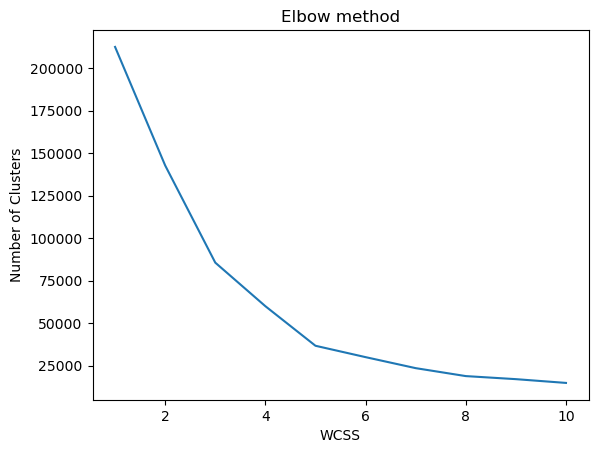

In [18]:
# Find the optimal number of clusters to use - Elbow method
from sklearn.cluster import KMeans
wcss = []
# Try no of clusters from 1 to 10
for cn in range(1, 11):
    kcluster = KMeans(n_clusters=cn, init='k-means++', random_state=0)
    kcluster.fit(X_train)
    wcss.append(kcluster.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('WCSS')
plt.ylabel('Number of Clusters')
plt.show()

In [19]:
kCluster = KMeans(n_clusters=5, init='k-means++', random_state=0)
kCluster.fit(X_train)

C:\Users\emax4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\emax4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [38]:
y_pred = kCluster.predict(X_test)
y_predX = kCluster.predict(X)

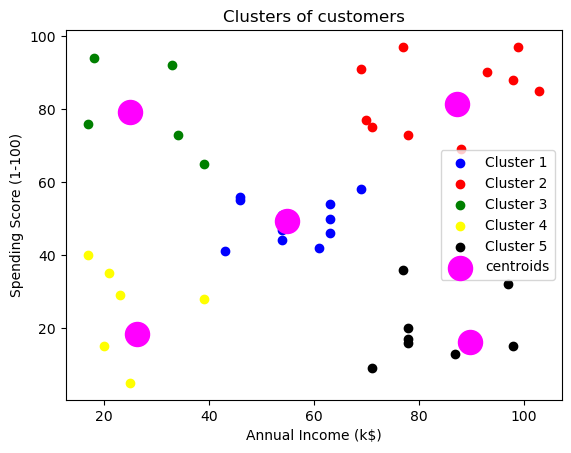

In [36]:
# s: size, c: color

plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], c = 'red', label = 'Cluster 2')
plt.scatter(X_test[y_pred == 2, 0], X_test[y_pred == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X_test[y_pred == 3, 0], X_test[y_pred == 3, 1], c = 'yellow', label = 'Cluster 4')
plt.scatter(X_test[y_pred == 4, 0], X_test[y_pred == 4, 1], c = 'black', label = 'Cluster 5')
plt.scatter(kCluster.cluster_centers_[:, 0], kCluster.cluster_centers_[:, 1],s = 300, c='magenta', label = 'centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

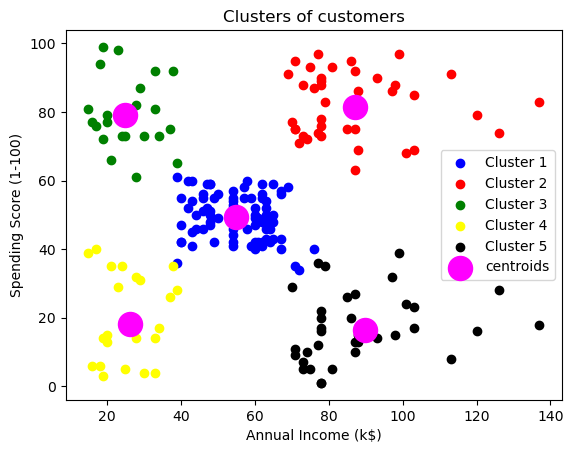

In [39]:
plt.scatter(X[y_predX == 0, 0], X[y_predX == 0, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_predX == 1, 0], X[y_predX == 1, 1], c = 'red', label = 'Cluster 2')
plt.scatter(X[y_predX == 2, 0], X[y_predX == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_predX == 3, 0], X[y_predX == 3, 1], c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_predX == 4, 0], X[y_predX == 4, 1], c = 'black', label = 'Cluster 5')
plt.scatter(kCluster.cluster_centers_[:, 0], kCluster.cluster_centers_[:, 1],s = 300, c='magenta', label = 'centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [33]:
kCluster.cluster_centers_[:, 0], kCluster.cluster_centers_[:, 1]

(array([54.95774648, 87.20689655, 25.        , 26.3125    , 89.74074074]),
 array([49.33802817, 81.4137931 , 79.17647059, 18.3125    , 16.33333333]))